<div style="background-color:#e0f7fa; padding:20px; border-left:6px solid teal; border-radius:12px; text-align:center;">
  <h2 style="color:teal; font-weight:bold; font-family:Arial, sans-serif; margin:0;">
     <span style="font-size:28px;">Palmer Peenguins</span>
  </h2>
</div>


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
import graphviz
import seaborn as sns
from sklearn.metrics import accuracy_score
from IPython.display import display

# P1: ĐỌC DỮ LIỆU VÀ XỬ LÝ 

## 1. Đọc dữ liệu  

In [3]:
penguins = pd.read_csv("penguins.csv")

print(penguins.info())

print(penguins.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN 

## 2. In dữ liệu để kiểm tra   

In [4]:
for col in penguins.columns:
  print(f"Cột: {col}")
  print(penguins[col].unique())

Cột: species
['Adelie' 'Gentoo' 'Chinstrap']
Cột: island
['Torgersen' 'Biscoe' 'Dream']
Cột: bill_length_mm
[39.1 39.5 40.3  nan 36.7 39.3 38.9 39.2 34.1 42.  37.8 41.1 38.6 34.6
 36.6 38.7 42.5 34.4 46.  37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2
 40.9 36.4 42.2 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 37.5 42.3 40.1
 35.  34.5 41.4 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2
 42.1 42.9 35.1 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7
 40.2 35.2 41.5 38.5 43.1 36.8 35.6 32.1 40.7 46.1 50.  48.7 47.6 46.5
 45.4 46.7 43.3 46.8 49.  45.5 48.4 49.3 49.2 46.2 50.2 45.1 46.3 44.5
 47.8 48.2 47.3 59.6 49.1 42.6 44.4 44.  49.6 45.3 50.5 43.6 44.9 45.2
 46.6 48.5 50.1 45.  43.8 50.4 45.7 54.3 49.8 49.5 43.5 50.7 47.7 46.4
 48.6 47.5 51.1 52.5 47.4 50.8 43.4 51.3 52.1 52.2 49.4 46.9 55.9 47.2
 41.7 53.4 48.1 51.5 55.1 48.8 49.9 52.7 51.7 47.  52.  45.9 50.3 58.
 42.4 50.6 52.8 54.2 51.  49.7 53.5 50.9 51.4 51.9 55.8]
Cột: bill_depth_mm
[18.7 17.4 18.   nan 19.3 20.6 17.8 

## 3. Kiểm tra dữ liệu null  

In [5]:
print("Kiểm tra dữ liệu bị thiếu (null values):")
print(penguins.isnull().sum())

Kiểm tra dữ liệu bị thiếu (null values):
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


### 3.1 Mối quan hệ giữa nhãn với các dòng null 

In [6]:
# Giả sử bạn đang dùng biến `penguins` để lưu DataFrame
label_col = 'species'

for col in penguins.columns:
    null_rows = penguins[penguins[col].isnull()]
    if null_rows.shape[0] > 0:
        print(f"\nPhân bố label '{label_col}' trong các dòng bị thiếu ở cột '{col}':")
        print(null_rows[label_col].value_counts(normalize=True))  # In tỷ lệ phần trăm từng lớp
        print(f"Tổng số dòng bị thiếu ở cột '{col}': {null_rows.shape[0]}")

# So sánh với phân bố nhãn trong toàn bộ dataset
print("\nPhân bố nhãn trong toàn bộ dataset:")
print(penguins[label_col].value_counts(normalize=True))



Phân bố label 'species' trong các dòng bị thiếu ở cột 'bill_length_mm':
species
Adelie    0.5
Gentoo    0.5
Name: proportion, dtype: float64
Tổng số dòng bị thiếu ở cột 'bill_length_mm': 2

Phân bố label 'species' trong các dòng bị thiếu ở cột 'bill_depth_mm':
species
Adelie    0.5
Gentoo    0.5
Name: proportion, dtype: float64
Tổng số dòng bị thiếu ở cột 'bill_depth_mm': 2

Phân bố label 'species' trong các dòng bị thiếu ở cột 'flipper_length_mm':
species
Adelie    0.5
Gentoo    0.5
Name: proportion, dtype: float64
Tổng số dòng bị thiếu ở cột 'flipper_length_mm': 2

Phân bố label 'species' trong các dòng bị thiếu ở cột 'body_mass_g':
species
Adelie    0.5
Gentoo    0.5
Name: proportion, dtype: float64
Tổng số dòng bị thiếu ở cột 'body_mass_g': 2

Phân bố label 'species' trong các dòng bị thiếu ở cột 'sex':
species
Adelie    0.545455
Gentoo    0.454545
Name: proportion, dtype: float64
Tổng số dòng bị thiếu ở cột 'sex': 11

Phân bố nhãn trong toàn bộ dataset:
species
Adelie       0.441

### => Do các giá trị thiếu phân bố nhãn khá cân bằng nên xử lý bằng cách điền median/mode để giữ lại toàn bộ dữ liệu.



## 4. Xử lý missing value 

In [7]:
# Cột số và cột phân loại
numeric_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
categorical_col = "sex"

# Xử lý missing cho từng species
for species in penguins["species"].unique():
    species_mask = penguins["species"] == species
    
    # Cột số: dùng median theo từng loài
    for col in numeric_cols:
        median_val = penguins.loc[species_mask, col].median()
        penguins.loc[species_mask & penguins[col].isnull(), col] = median_val

    # Cột phân loại (sex): dùng mode theo từng loài
    mode_series = penguins.loc[species_mask, categorical_col].mode()
    if not mode_series.empty:
        mode_val = mode_series[0]
        penguins.loc[species_mask & penguins[categorical_col].isnull(), categorical_col] = mode_val

# Kiểm tra kết quả
print("Số dòng null sau khi xử lý:")
print(penguins.isnull().sum())


Số dòng null sau khi xử lý:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


## 5. Kiểm tra outlier  

In [8]:
penguins_clean = penguins.copy()
numeric_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
total_rows = penguins_clean.shape[0]

print("Thống kê outlier theo IQR (trước khi loại bỏ):")

for col in numeric_cols:
    Q1 = penguins_clean[col].quantile(0.25)
    Q3 = penguins_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = penguins_clean[
        (penguins_clean[col] < lower_bound) | (penguins_clean[col] > upper_bound)
    ]

    count = outliers.shape[0]
    rate = count / total_rows * 100

    print(f"- {col}: {count} outliers ({rate:.2f}%)")


Thống kê outlier theo IQR (trước khi loại bỏ):
- bill_length_mm: 0 outliers (0.00%)
- bill_depth_mm: 0 outliers (0.00%)
- flipper_length_mm: 0 outliers (0.00%)
- body_mass_g: 0 outliers (0.00%)


## 6. Giữ lại những feature cần thiết 

In [9]:
df = penguins[[
    "species",
    "bill_length_mm",
    "flipper_length_mm",
    "body_mass_g",
    "sex"
]]


## 7. One-hot coding các features  

In [10]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True, dtype=int)
print(df.head())

  species  bill_length_mm  flipper_length_mm  body_mass_g  sex_male
0  Adelie            39.1              181.0       3750.0         1
1  Adelie            39.5              186.0       3800.0         0
2  Adelie            40.3              195.0       3250.0         0
3  Adelie            38.8              190.0       3700.0         0
4  Adelie            36.7              193.0       3450.0         0


# P2: Chia tập train/test trên 4 tý lệ  

## 1. Tách dữ liệu thành đặc trưng và nhãn  

In [11]:
y = df["species"]
X = df.drop(columns=["species"])

## 2. Tạo các tập train/test  

In [12]:
ratios = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
datasets = {} 

## 3. THực hiện chia train/test  

### 3.1 Chia tập train/test  

In [13]:
for train_size, test_size in ratios:
    sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)

    for train_idx, test_idx in sss.split(X, y):
        X_train = X.iloc[train_idx]
        X_test = X.iloc[test_idx]
        y_train = y.iloc[train_idx]
        y_test = y.iloc[test_idx]

        key = f"{int(train_size*100)}_{int(test_size*100)}"
        datasets[key] = {
            "X_train": X_train,
            "y_train": y_train,
            "X_test": X_test,
            "y_test": y_test
        }

        print(f"Tập chia: {key}")
        print("  • Số mẫu train:", X_train.shape[0])
        print("  • Số mẫu test :", X_test.shape[0])
        print("-" * 50)

Tập chia: 40_60
  • Số mẫu train: 137
  • Số mẫu test : 207
--------------------------------------------------
Tập chia: 60_40
  • Số mẫu train: 206
  • Số mẫu test : 138
--------------------------------------------------
Tập chia: 80_20
  • Số mẫu train: 275
  • Số mẫu test : 69
--------------------------------------------------
Tập chia: 90_10
  • Số mẫu train: 309
  • Số mẫu test : 35
--------------------------------------------------


### 3.2 Visulize để thể hiện phân bố  

#### a. Tỉ lệ trên tập gốc  

C:\Users\Dell\AppData\Local\Temp\ipykernel_8464\1127207597.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=label_counts.index, y=label_props.values, palette=colors)
C:\Users\Dell\AppData\Local\Temp\ipykernel_8464\1127207597.py:8: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  bars = sns.barplot(x=label_counts.index, y=label_props.values, palette=colors)


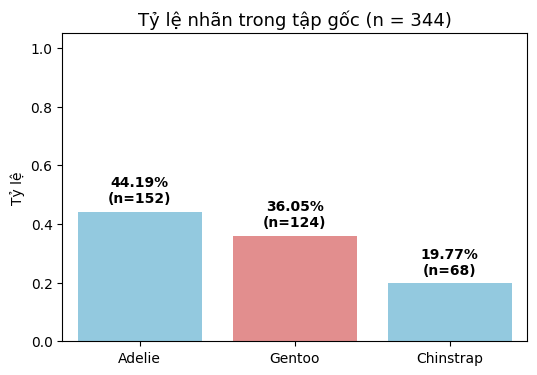

In [14]:
label_counts = y.value_counts()
label_props = y.value_counts(normalize=True).round(4)
total = len(y)

plt.figure(figsize=(6, 4))
colors = ["skyblue", "lightcoral"]

bars = sns.barplot(x=label_counts.index, y=label_props.values, palette=colors)

for i, (count, prop) in enumerate(zip(label_counts, label_props)):
    bars.text(i, prop + 0.02,
              f"{(prop*100):.2f}%\n(n={count})",
              ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.ylim(0, 1.05)
plt.ylabel("Tỷ lệ")
plt.title(f"Tỷ lệ nhãn trong tập gốc (n = {total})", fontsize=13)
plt.xlabel("")
plt.show()


#### b. Trên từng tập train/test  

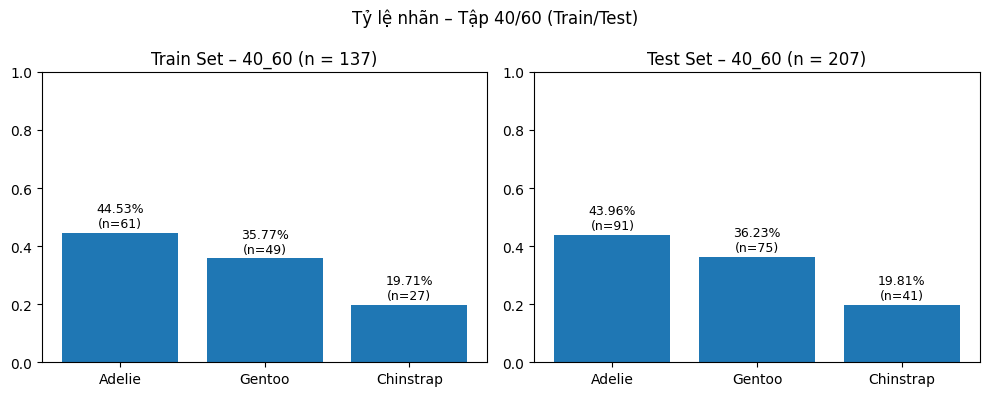

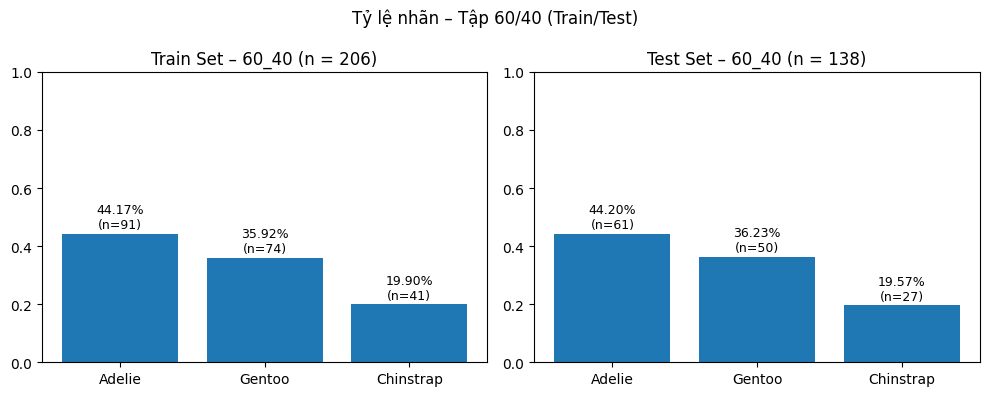

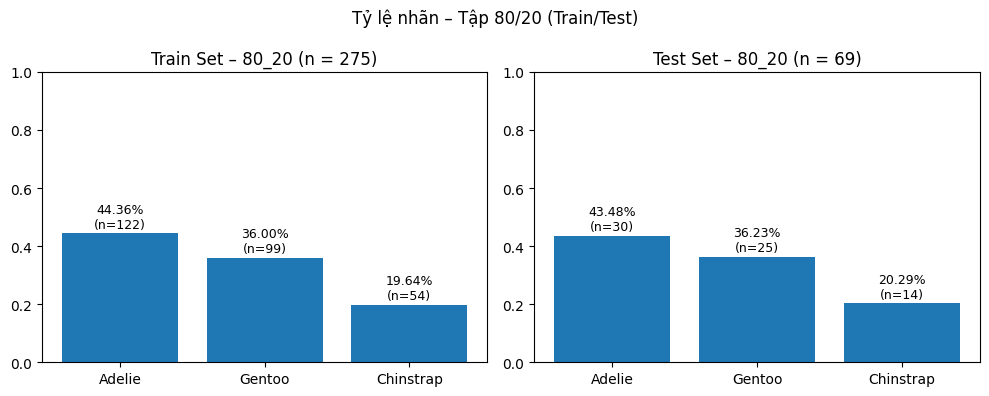

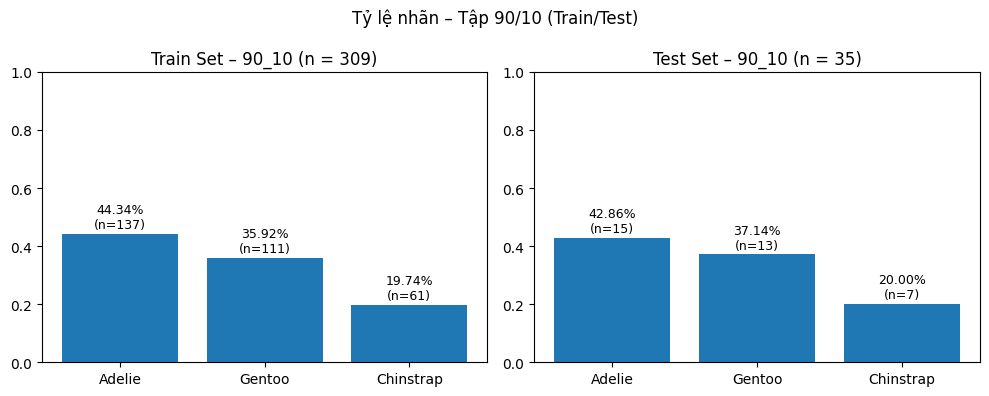

In [15]:
for key, subset in datasets.items():
    y_train = subset['y_train']
    y_test = subset['y_test']

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # ---------- Train set ----------
    train_counts = y_train.value_counts()
    train_dist = y_train.value_counts(normalize=True)
    train_labels = train_counts.index.tolist()
    train_values = [train_dist.get(lbl, 0) for lbl in train_labels]
    n_train = len(y_train)

    axs[0].bar(train_labels, train_values)
    axs[0].set_ylim(0, 1)
    axs[0].set_title(f"Train Set – {key} (n = {n_train})")

    # Hiển thị % và số lượng
    for i, lbl in enumerate(train_labels):
        val = train_values[i]
        count = train_counts.get(lbl, 0)
        axs[0].text(i, val + 0.02, f"{val:.2%}\n(n={count})", ha='center', fontsize=9)

    # ---------- Test set ----------
    test_counts = y_test.value_counts()
    test_dist = y_test.value_counts(normalize=True)
    test_labels = test_counts.index.tolist()
    test_values = [test_dist.get(lbl, 0) for lbl in test_labels]
    n_test = len(y_test)

    axs[1].bar(test_labels, test_values)
    axs[1].set_ylim(0, 1)
    axs[1].set_title(f"Test Set – {key} (n = {n_test})")

    for i, lbl in enumerate(test_labels):
        val = test_values[i]
        count = test_counts.get(lbl, 0)
        axs[1].text(i, val + 0.02, f"{val:.2%}\n(n={count})", ha='center', fontsize=9)

    plt.suptitle(f"Tỷ lệ nhãn – Tập {key.replace('_', '/')} (Train/Test)")
    plt.tight_layout()
    plt.show()


# P3: Huấn luyện cây quyết định  

## 1. Build cây quyết định  


Cây quyết định cho tập 40/60 (max_depth = 5):



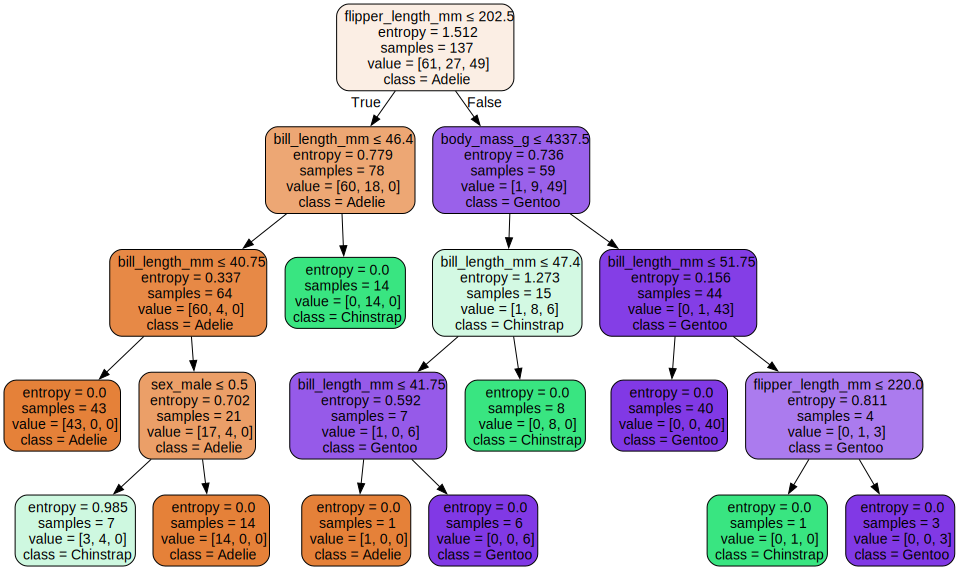


Cây quyết định cho tập 60/40 (max_depth = 5):



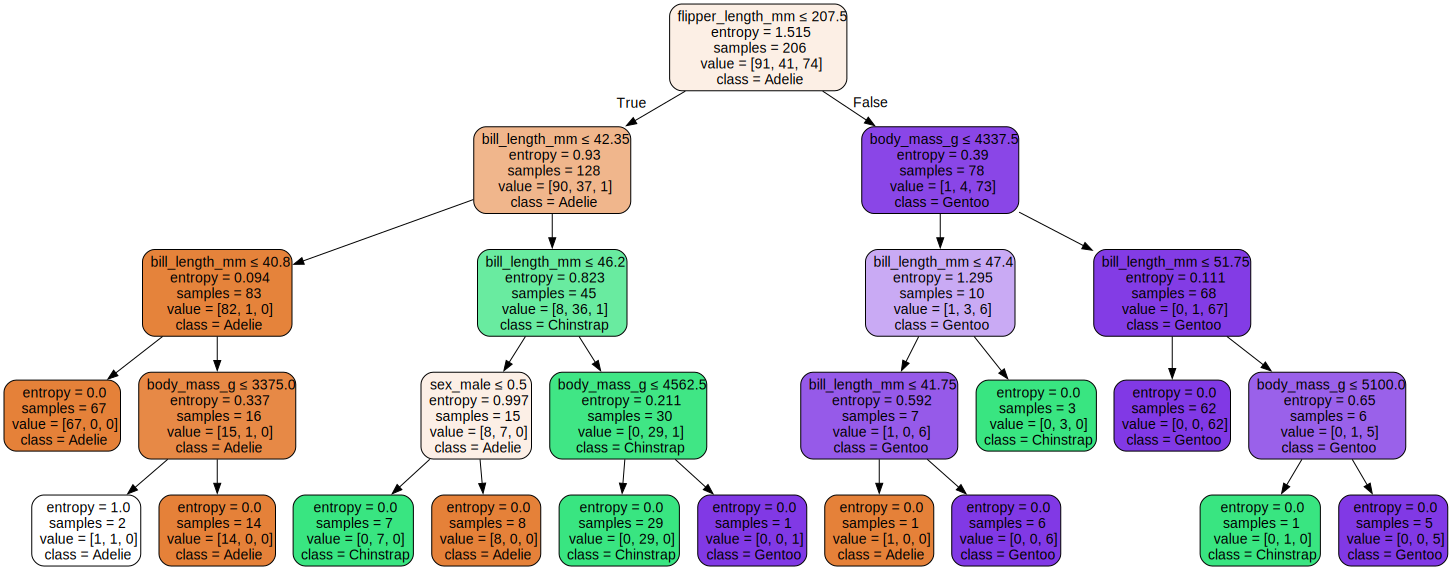


Cây quyết định cho tập 80/20 (max_depth = 5):



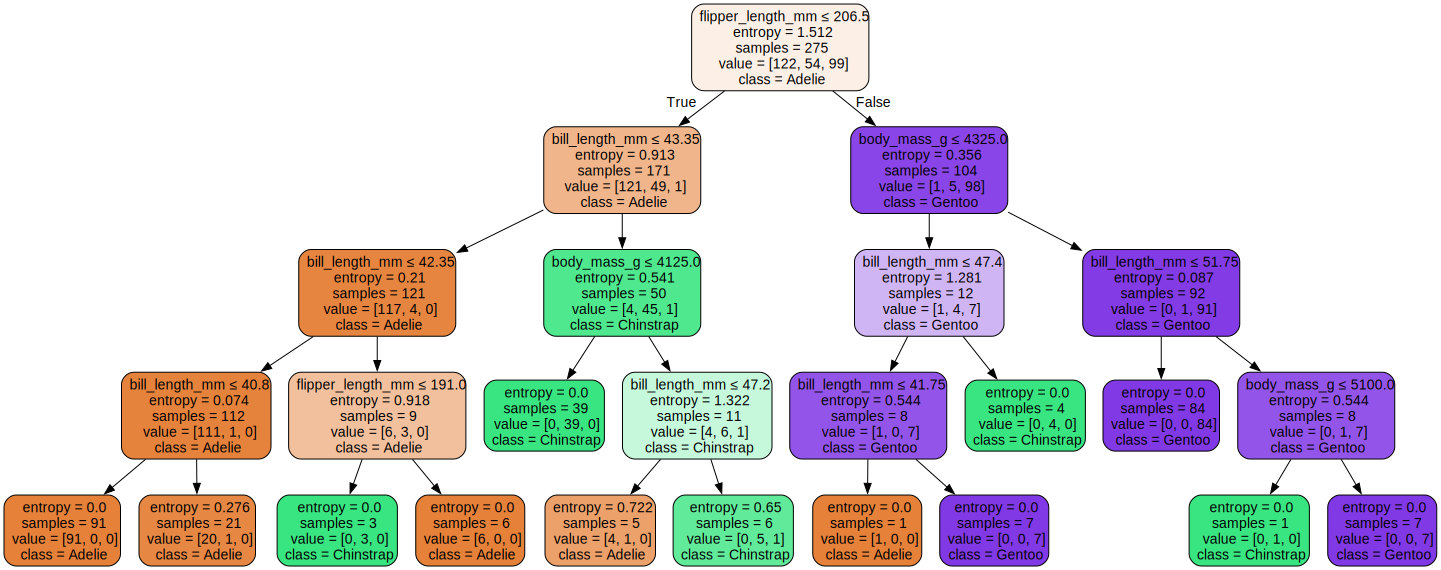


Cây quyết định cho tập 90/10 (max_depth = 5):



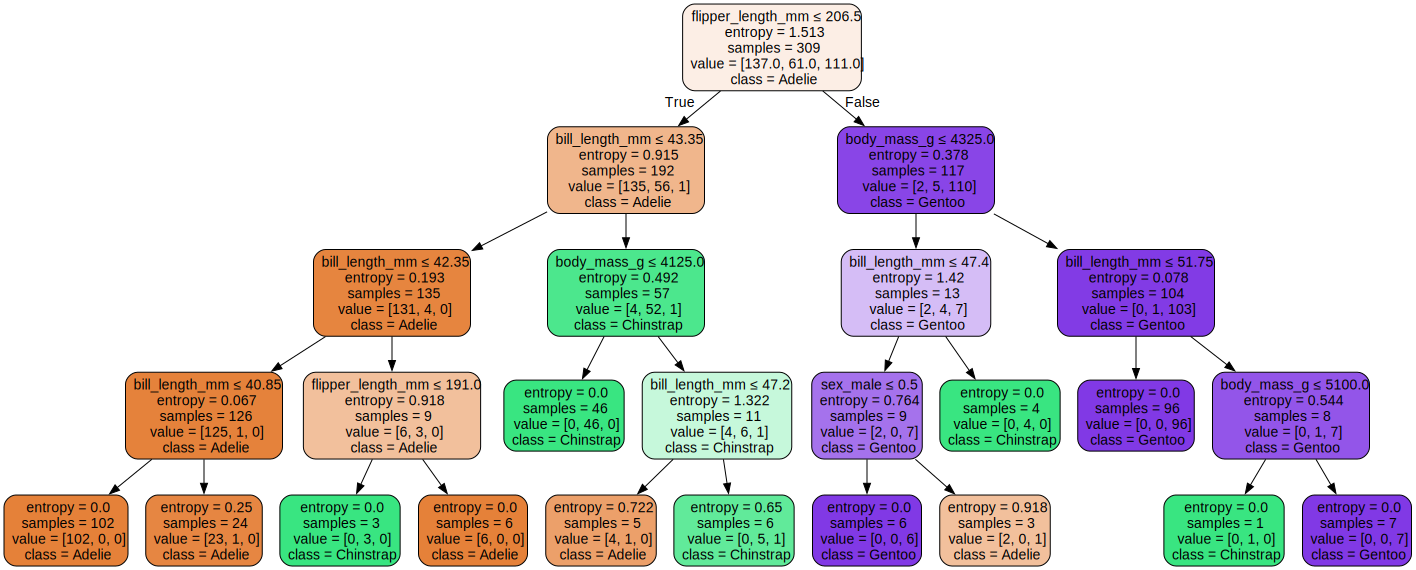

In [16]:
for key, subset in datasets.items(): 
    X_train = subset['X_train']
    y_train = subset['y_train']

    clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
    clf.fit(X_train, y_train)

    # Sửa lỗi: chuyển class names sang chuỗi
    class_names = [str(cls) for cls in clf.classes_]

    dot_data = export_graphviz(clf,
                                out_file=None,
                                feature_names=X_train.columns,
                                class_names=class_names,
                                filled=True, rounded=True,
                                special_characters=True)
    
    graph = graphviz.Source(dot_data)
    print(f"\nCây quyết định cho tập {key.replace('_', '/')} (max_depth = 5):\n")
    display(graph)


## 2. Đánh giá mô hình và confusion matrix  


Classification Report – Tập 40/60 (max_depth=4):
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        91
   Chinstrap       0.95      1.00      0.98        41
      Gentoo       0.97      0.99      0.98        75

    accuracy                           0.98       207
   macro avg       0.98      0.98      0.98       207
weighted avg       0.98      0.98      0.98       207



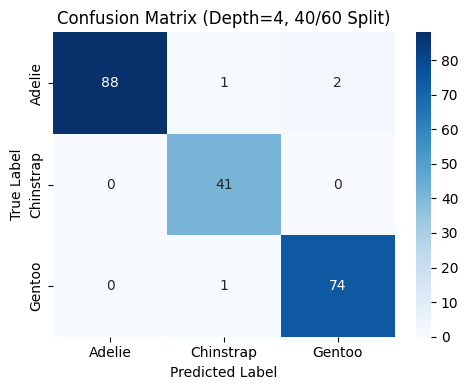


Classification Report – Tập 60/40 (max_depth=4):
              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        61
   Chinstrap       0.96      1.00      0.98        27
      Gentoo       0.98      0.98      0.98        50

    accuracy                           0.99       138
   macro avg       0.98      0.99      0.98       138
weighted avg       0.99      0.99      0.99       138



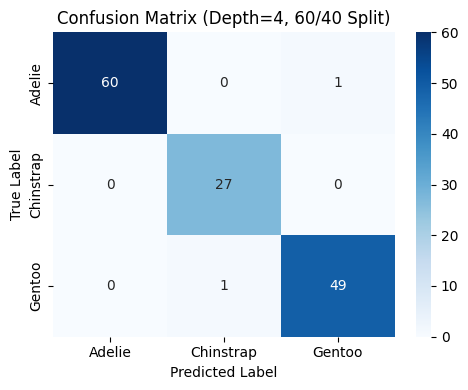


Classification Report – Tập 80/20 (max_depth=4):
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       0.96      1.00      0.98        25

    accuracy                           0.99        69
   macro avg       0.99      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69



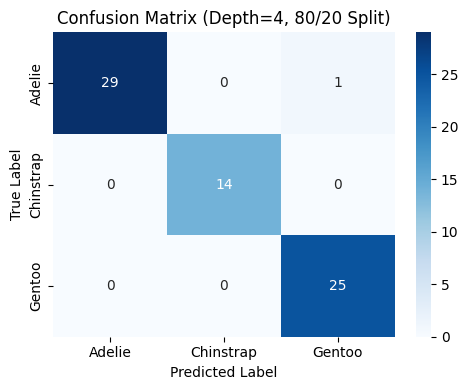


Classification Report – Tập 90/10 (max_depth=4):
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        15
   Chinstrap       1.00      1.00      1.00         7
      Gentoo       1.00      1.00      1.00        13

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



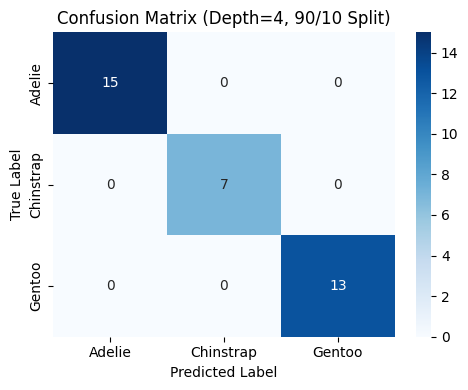

In [17]:
for key, subset in datasets.items():
    X_test = subset["X_test"]
    y_test = subset["y_test"]

    # Dự đoán từ cây đã huấn luyện
    model = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
    model.fit(subset["X_train"], subset["y_train"])
    y_pred = model.predict(X_test)

    # In báo cáo đánh giá
    print(f"\nClassification Report – Tập {key.replace('_', '/')} (max_depth=4):")
    print(classification_report(y_test, y_pred, digits=2))

    # Vẽ confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_,
                yticklabels=model.classes_)

    plt.title(f"Confusion Matrix (Depth=4, {key.replace('_', '/')} Split)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


# P4. So sánh theo max_depth  

## 1. Huấn luyện mô hình với max_depth  

In [18]:
X_train = datasets['80_20']['X_train']
y_train = datasets['80_20']['y_train']
X_test = datasets['80_20']['X_test']
y_test = datasets['80_20']['y_test']

depth_list = [None, 2, 3, 4, 5, 6, 7]
accuracy_results = []
models_by_depth = {}

for depth in depth_list:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    models_by_depth[str(depth)] = clf

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results.append((str(depth), acc))
    print(f"max_depth = {depth}, accuracy = {acc:.2f}")

max_depth = None, accuracy = 0.99
max_depth = 2, accuracy = 0.97
max_depth = 3, accuracy = 0.97
max_depth = 4, accuracy = 0.99
max_depth = 5, accuracy = 0.99
max_depth = 6, accuracy = 0.99
max_depth = 7, accuracy = 0.99


## 2. Bulid decision tree   


Cây quyết định (depth = None):



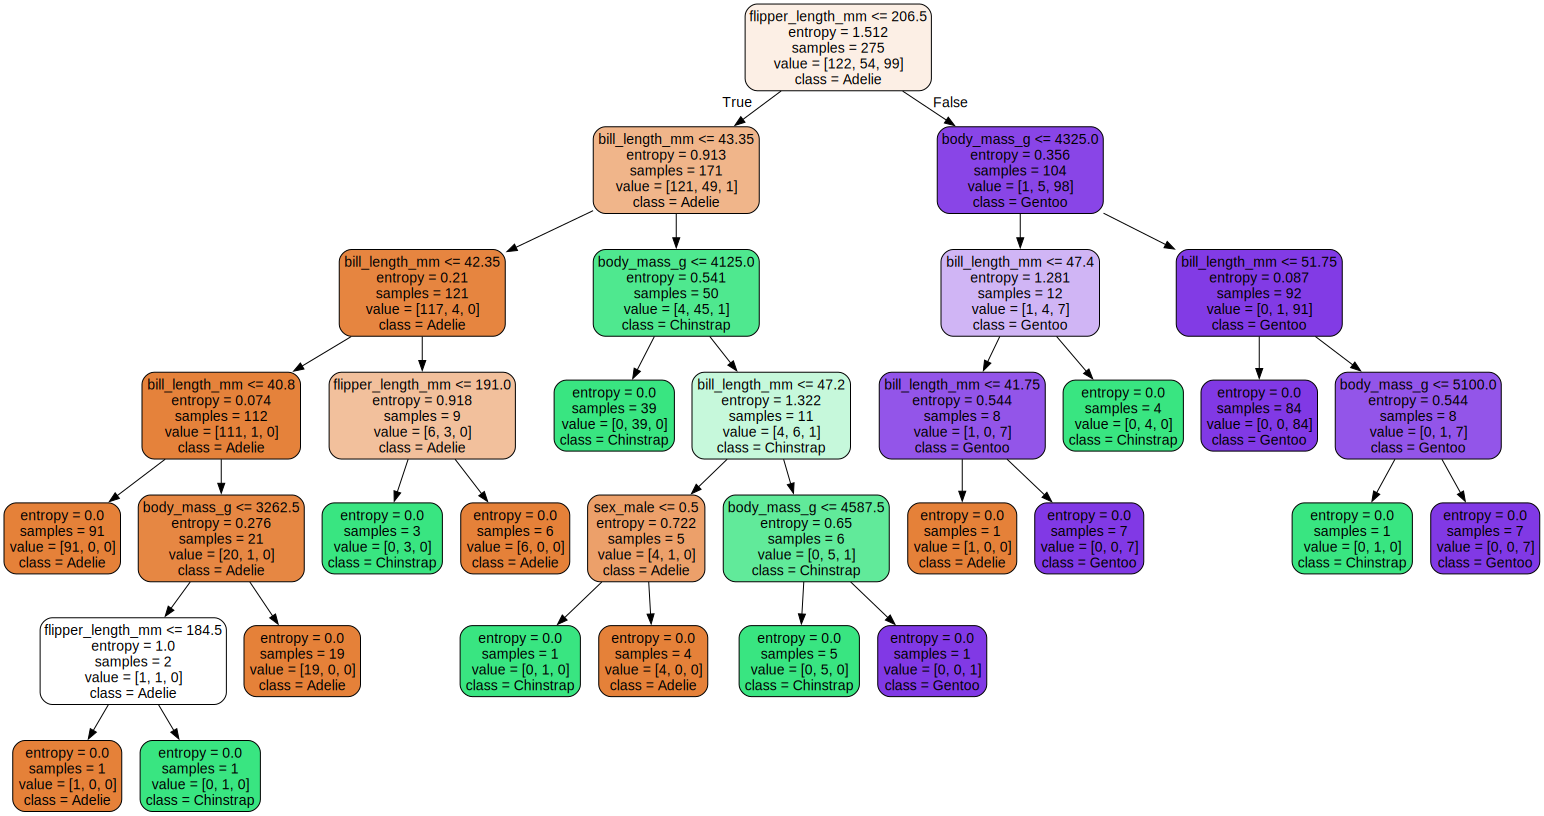


Cây quyết định (depth = 2):



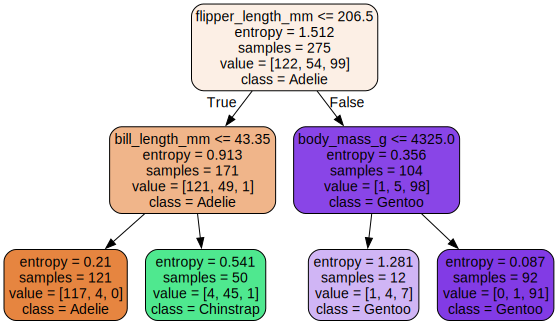


Cây quyết định (depth = 3):



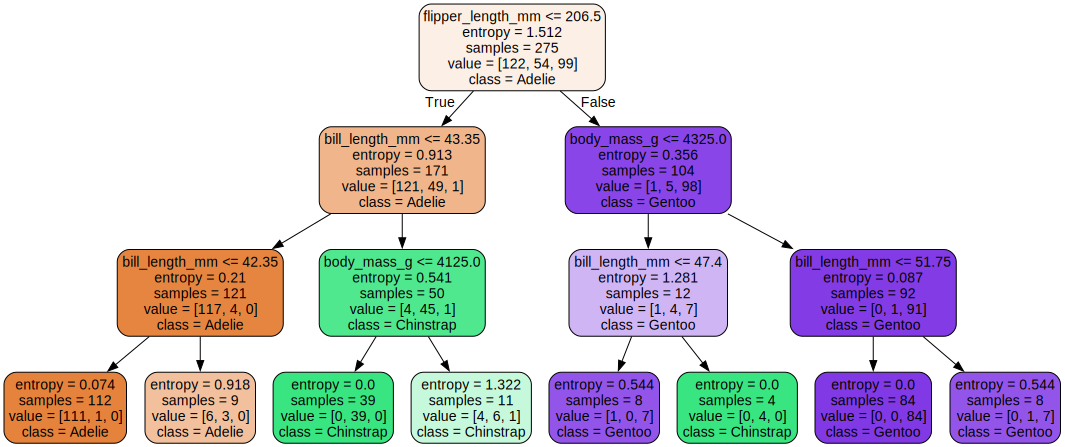


Cây quyết định (depth = 4):



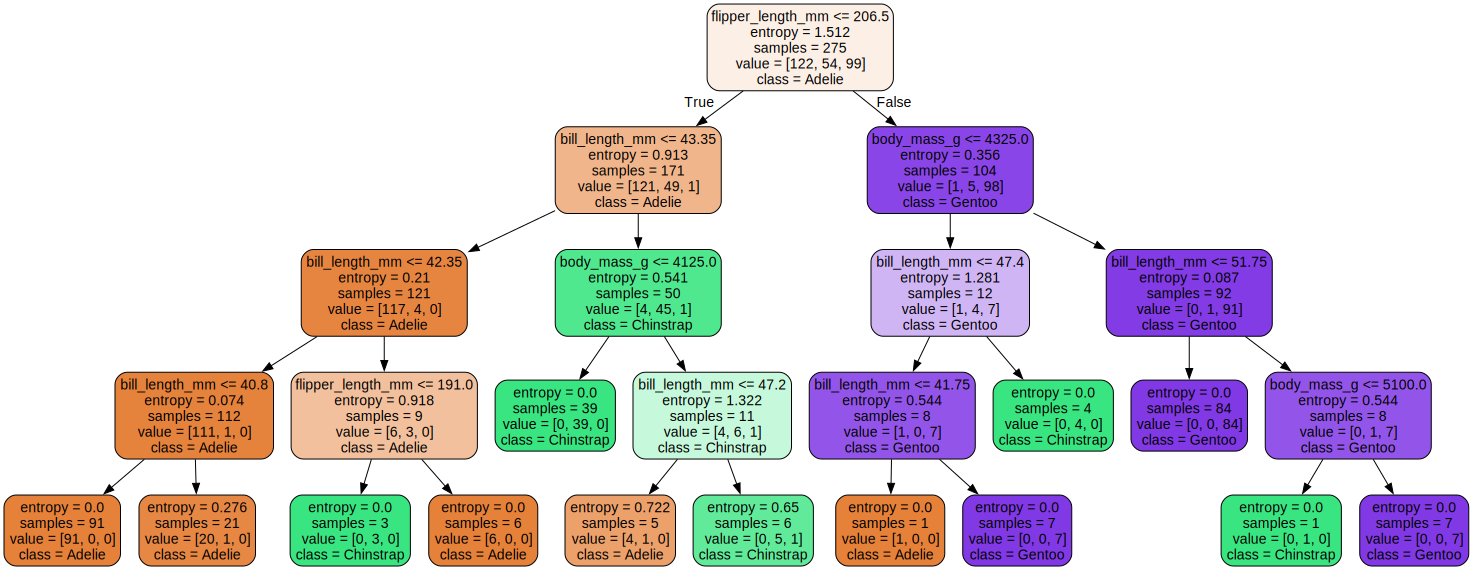


Cây quyết định (depth = 5):



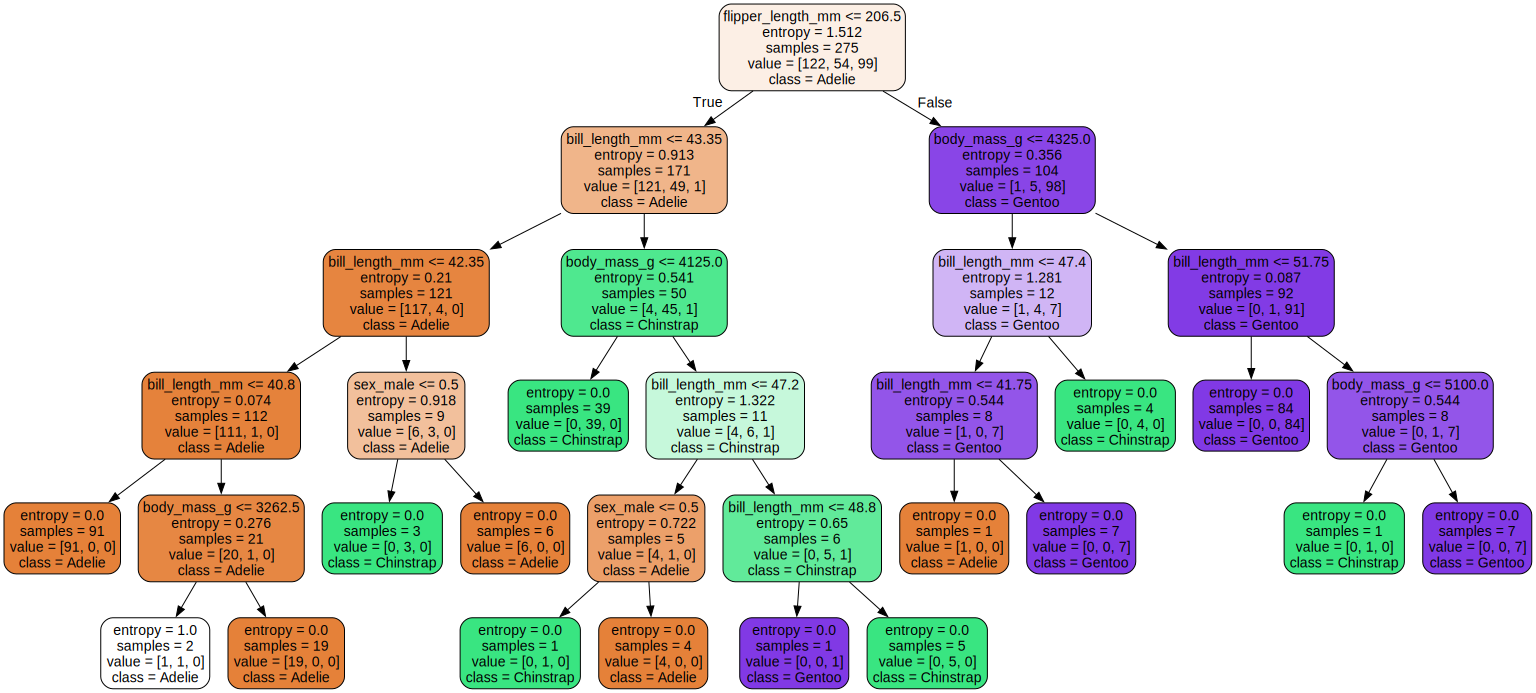


Cây quyết định (depth = 6):



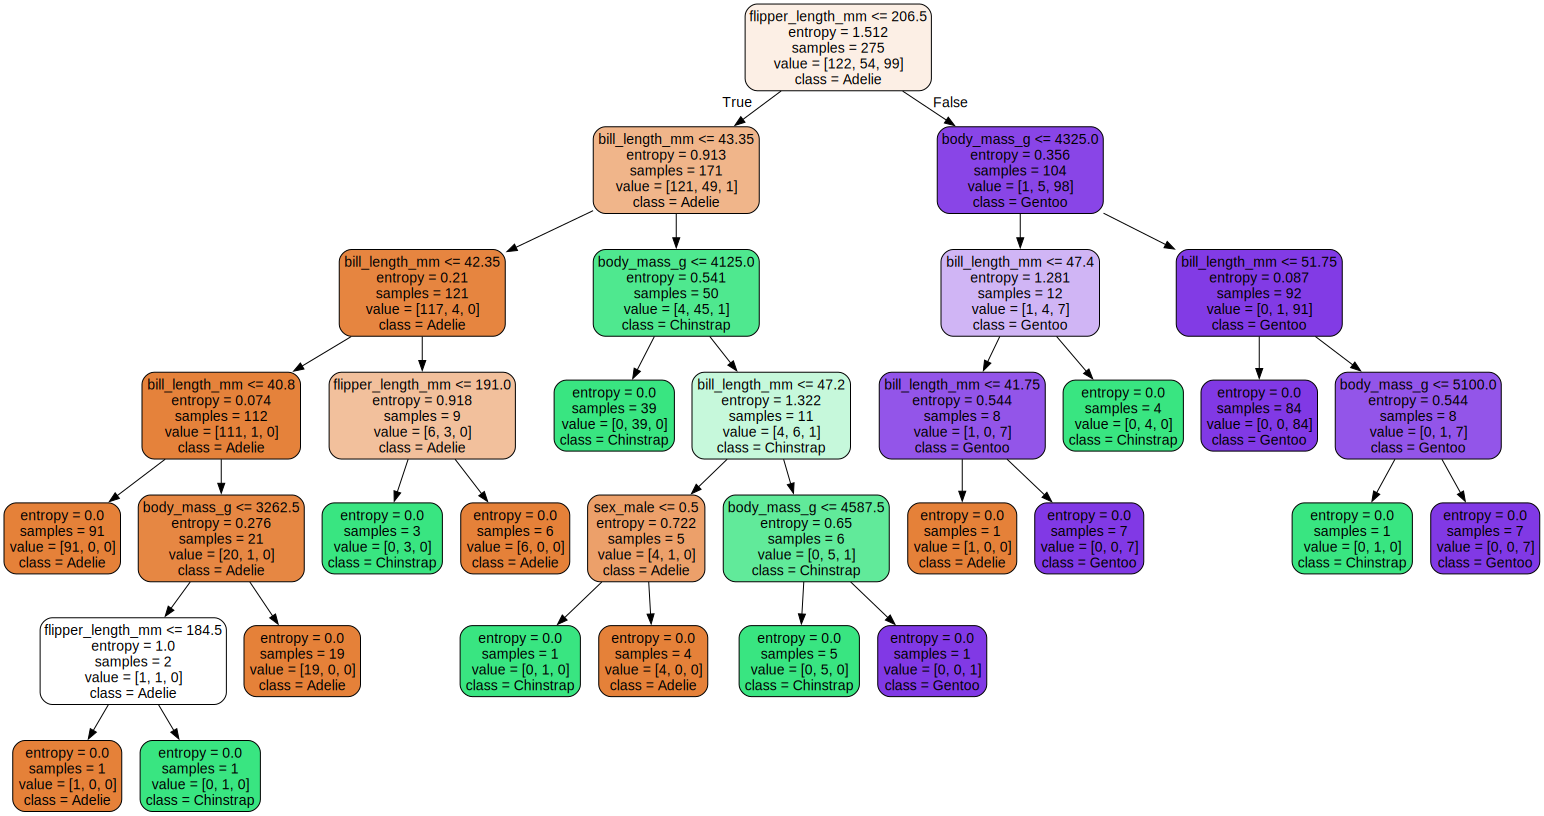


Cây quyết định (depth = 7):



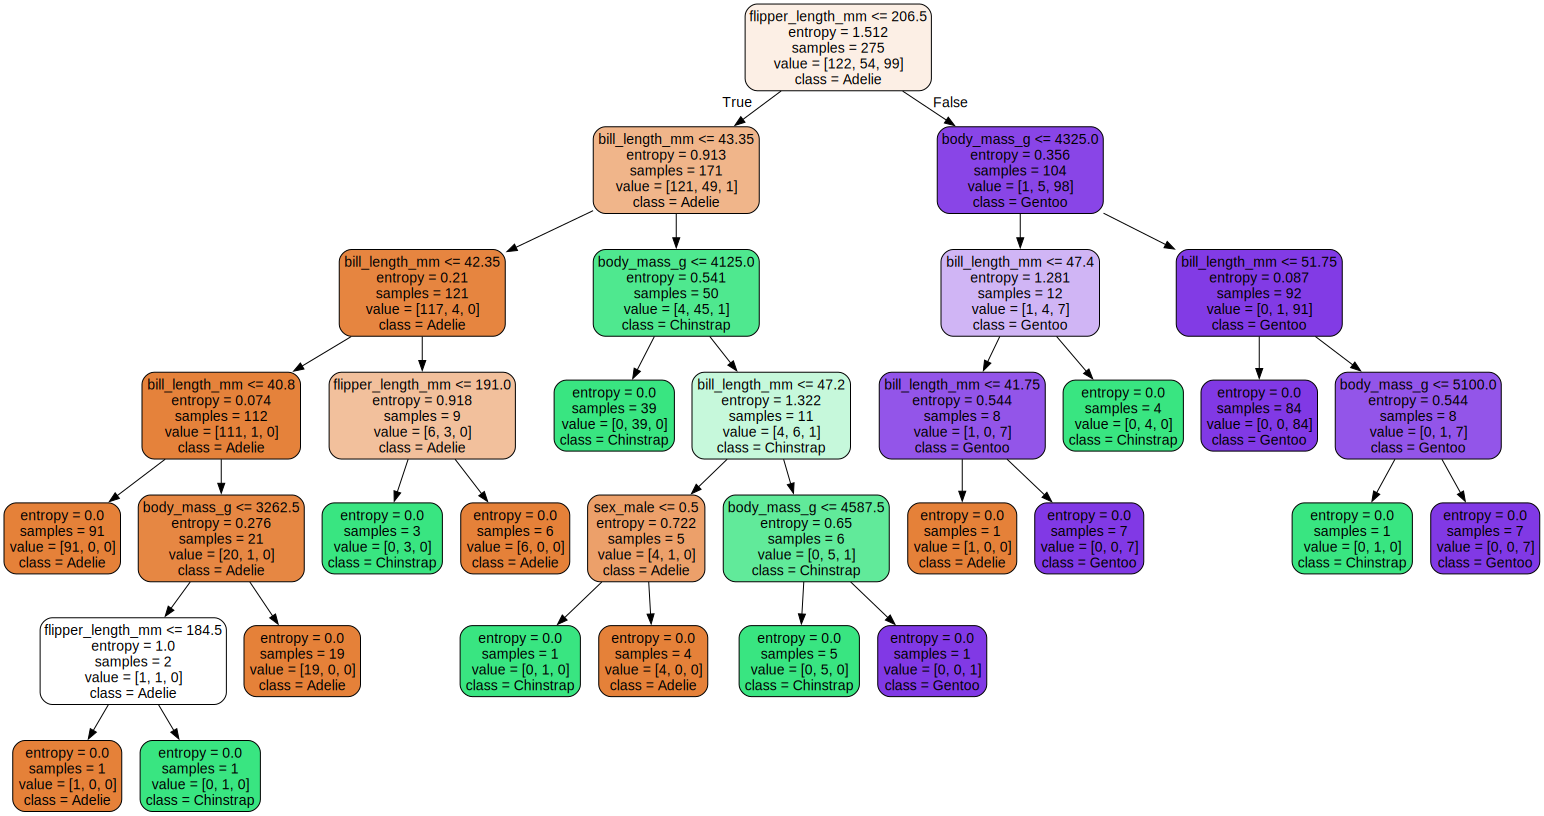

In [19]:
for depth in depth_list:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    dot_data = export_graphviz(clf,
                                out_file=None,
                                feature_names=X_train.columns,
                                class_names=[str(cls) for cls in clf.classes_],  # dùng tên loài
                                filled=True, rounded=True)

    graph = graphviz.Source(dot_data)
    name = f"tree_depth_None" if depth is None else f"tree_depth_{depth}"
    print(f"\nCây quyết định (depth = {depth}):\n")
    display(graph)


## 3. Ghi lại accuracy  

max_depth:	None	2	3	4	5	6	7	
accuracy: 	0.9855	0.9710	0.9710	0.9855	0.9855	0.9855	0.9855	


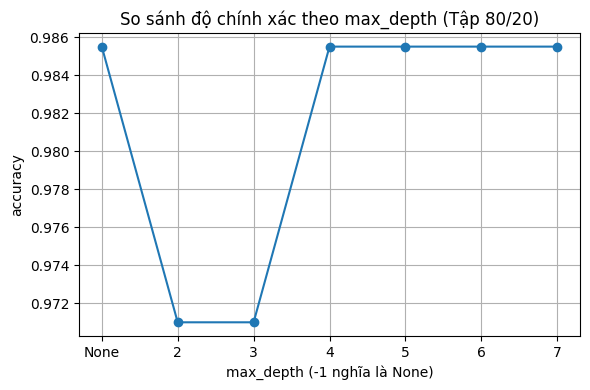

In [20]:
df_acc = pd.DataFrame(accuracy_results, columns=["max_depth", "accuracy"])
df_acc["max_depth"] = df_acc["max_depth"].apply(lambda x: -1 if x is None else x)
df_acc["accuracy"] = df_acc["accuracy"].round(4)

print("max_depth:", end="\t")
for d in df_acc["max_depth"]:
    label = "None" if d == -1 else str(d)
    print(f"{label}", end="\t")
print()

print("accuracy: ", end="\t")
for acc in df_acc["accuracy"]:
    print(f"{acc:.4f}", end="\t")
print()

plt.figure(figsize=(6, 4))
plt.plot(df_acc["max_depth"], df_acc["accuracy"], marker="o")
plt.title("So sánh độ chính xác theo max_depth (Tập 80/20)")
plt.xlabel("max_depth (-1 nghĩa là None)")
plt.ylabel("accuracy")
plt.grid(True)
plt.xticks(df_acc["max_depth"], [str(d) if d != -1 else "None" for d in df_acc["max_depth"]])
plt.tight_layout()
plt.show()
